# Accuracy check

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

## Load Predictions

In [3]:
results = pd.read_csv('results/predictions_early_80_new.csv')
results.head(10)

,id,Headline,target,preds,Reliable,Unreliable
0,1357,"American Dream, Revisited",1,unreliable,0.030065,0.969935
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.014819,0.985181
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.239921,0.760079
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.388118,0.611881
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.010889,0.989111
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,unreliable,0.486016,0.513984
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.972764,0.027236
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.345873,0.654127
8,2445,South Carolina police officer charged with mur...,0,reliable,0.982056,0.017944
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.007808,0.992192


In [4]:
targets = ['reliable', 'unreliable']
targets_dict = dict(zip(targets, range(len(targets))))
targets_dict

{'reliable': 0, 'unreliable': 1}

In [5]:
results['predict'] = list(map(lambda x: targets_dict[x], results['preds']))
results.head(10)

,id,Headline,target,preds,Reliable,Unreliable,predict
0,1357,"American Dream, Revisited",1,unreliable,0.030065,0.969935,1
1,2080,Clintons Are Under Multiple FBI Investigations...,1,unreliable,0.014819,0.985181,1
2,2718,The FBI Can’t Actually Investigate a Candidate...,1,unreliable,0.239921,0.760079,1
3,812,Confirmed: Public overwhelmingly (10-to-1) say...,1,unreliable,0.388118,0.611881,1
4,4886,Nanny In Jail After Force Feeding Baby To Death,1,unreliable,0.010889,0.989111,1
5,4890,Media Roll Out Welcome Mat for ‘Humanitarian’ ...,1,unreliable,0.486016,0.513984,1
6,4714,Hillary Clinton accepts nomination with 'bound...,0,reliable,0.972764,0.027236,0
7,1782,Police Turn In Badges Rather Than Incite Viole...,1,unreliable,0.345873,0.654127,1
8,2445,South Carolina police officer charged with mur...,0,reliable,0.982056,0.017944,0
9,3574,Tony Blair helpfully describes Remain voters a...,1,unreliable,0.007808,0.992192,1


## Performance Check

In [6]:
y_true = results.target
y_pred = results.predict

In [7]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90       639
          1       0.91      0.87      0.89       628

avg / total       0.89      0.89      0.89      1267



## Plot Confusion Matrix

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[586  53]
 [ 81 547]]


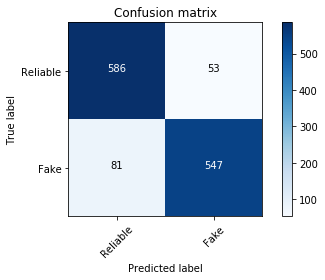

In [9]:
plot_confusion_matrix(confusion_matrix(y_true, y_pred),['Reliable', 'Fake'])

## Prediction distribution visualization

In [ ]:
rel = results[results['predict'].astype(str) == '0']['Reliable']
unrel = results[results['predict'].astype(str) == '1']['Reliable']

In [11]:
sns.distplot(rel)

NameError: name 'rel' is not defined

/opt/Anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


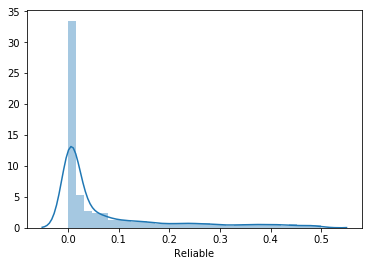

In [11]:
sns.distplot(unrel)